# 彩色图像读取与分析

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## 单张图片分析

In [2]:
img_path = r"data/dataset/img/beijing.bmp"
label_path = r"data/dataset/label/beijing.bmp"

In [3]:
# 读取图片和色彩空间转换
img = cv2.imread(img_path)
label_img = cv2.imread(label_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
# 从opencv的色彩空间到Photoshop的色彩空间
alpha, beta = np.array([100 / 255, 1, 1], dtype=float), np.array([0, -128, -128], dtype=float)
img = img * alpha + beta
img = np.asarray(np.round(img, 0), dtype=int)

In [4]:
# 构建数据集
color_dict = {(0, 0, 255): 'tobacco', (255, 0, 0): 'background'}
dataset = {label: img[np.all(label_img == color, axis=2)] for color, label in color_dict.items()}

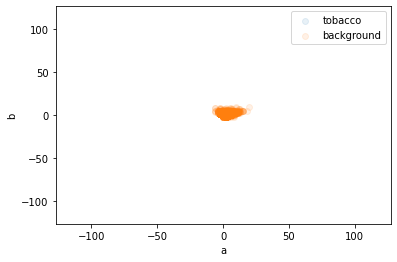

In [5]:
# 观察色彩分布情况
fig, axs = plt.subplots()
for label, data in dataset.items():
    l, a, b = [data[:, i] for i in range(3)]
    axs.scatter(a, b, label=label, alpha=0.1)
axs.set_xlim(-127, 127)
axs.set_ylim(-127, 127)
axs.set_xlabel('a')
axs.set_ylabel('b')
plt.legend()
plt.show()

单张图片仅能够观察到单一类别的色彩分布情况, 但已经可以看出背景的颜色分布情况多集中在较为暗的区域

## 多张图片分析
为了能够有效分析各类杂质的色彩分布情况, 构建多个类别的读取函数与图形绘制函数

In [6]:
from utils import read_labeled_img,lab_scatter

In [7]:
dataset = read_labeled_img("data/dataset", color_dict={(0, 0, 255): "yangeng", (255, 0, 0): "bejing", (0, 255, 0): "hongdianxian", (255, 0, 255): "chengsebangbangtang",(0, 255, 255): "lvdianxian"})

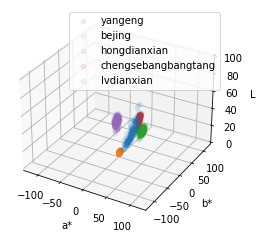

In [8]:
lab_scatter(dataset, class_max_num=200, is_3d=True)

上图所示是LAB色彩空间内的分布情况,每个类别只取了200个样本，这样子看来各个物体的颜色重叠是不太严重的

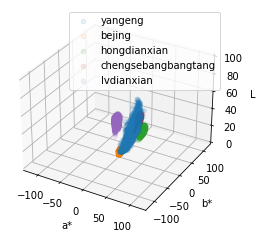

In [10]:
lab_scatter(dataset, class_max_num=10000, is_3d=True)

但是如果用很多样本来看，情况就不容乐观了，重叠还是很严重的，尤其是和背景以及橙色棒棒糖之间重叠特别厉害

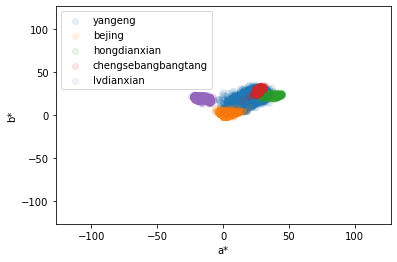

In [11]:
lab_scatter(dataset, is_3d=False)

如果我们抛弃亮度通道，只看颜色，就像上图这样，从这个角度看，烟梗的颜色和其他颜色之间的重叠度超级高呢。所以必须同时考虑亮度和其他类型的颜色。